In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from PyFVCOM.read import FileReader
import numpy as np

from cmocean import cm

invalid value encountered in cast (/opt/miniconda3/envs/pyfvcom/lib/python3.12/site-packages/utide/harmonics.py:16)
invalid value encountered in cast (/opt/miniconda3/envs/pyfvcom/lib/python3.12/site-packages/utide/harmonics.py:17)


In [2]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])

In [3]:
ds_temp = xr.open_dataset("../datos_validacion/data_2024/20240410090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc")

ds_temp

<xarray.Dataset> Size: 29GB
Dimensions:           (time: 1, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 8B 2024-04-10T09:00:00
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float64 5GB ...
    analysis_error    (time, lat, lon) float64 5GB ...
    mask              (time, lat, lon) float32 3GB ...
    sea_ice_fraction  (time, lat, lon) float64 5GB ...
    dt_1km_data       (time, lat, lon) timedelta64[ns] 5GB ...
    sst_anomaly       (time, lat, lon) float64 5GB ...
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [4]:
ds_temp.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 17999, lon: 36000)> Size: 5GB
[647964000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-04-10T09:00:00
  * lat      (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon      (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        "Final" version using Multi-Resolution Variational Analys...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO, i...

In [5]:
temp = ds_temp.analysed_sst.values
lon = ds_temp.lon.values
lat = ds_temp.lat.values

In [6]:
dt = ds_temp.time
dt

<xarray.DataArray 'time' (time: 1)> Size: 8B
array(['2024-04-10T09:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-04-10T09:00:00
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time of analyzed fields

In [7]:
import datetime
rounded = np.array(dt, dtype='datetime64[h]')
rounded[0]

numpy.datetime64('2024-04-10T09','h')

In [8]:
lon_ind = np.argwhere((lon >= -110.8) & (lon <= -110.3))
lat_ind = np.argwhere((lat >= 24.1) & (lat <= 24.6))

lon_cut = lon[lon_ind]
lat_cut = lat[lat_ind]

temp_sq = temp.squeeze()

In [9]:
lon_ind = lon_ind.squeeze()
lat_ind = lat_ind.squeeze()

temperatura_cortada = temp_sq[np.ix_(lat_ind, lon_ind)]
temperatura_cortada_cel = temperatura_cortada-273.15

In [10]:
lon_tri = np.array([-110.6775])
lat_tri = np.array([24.43911667])

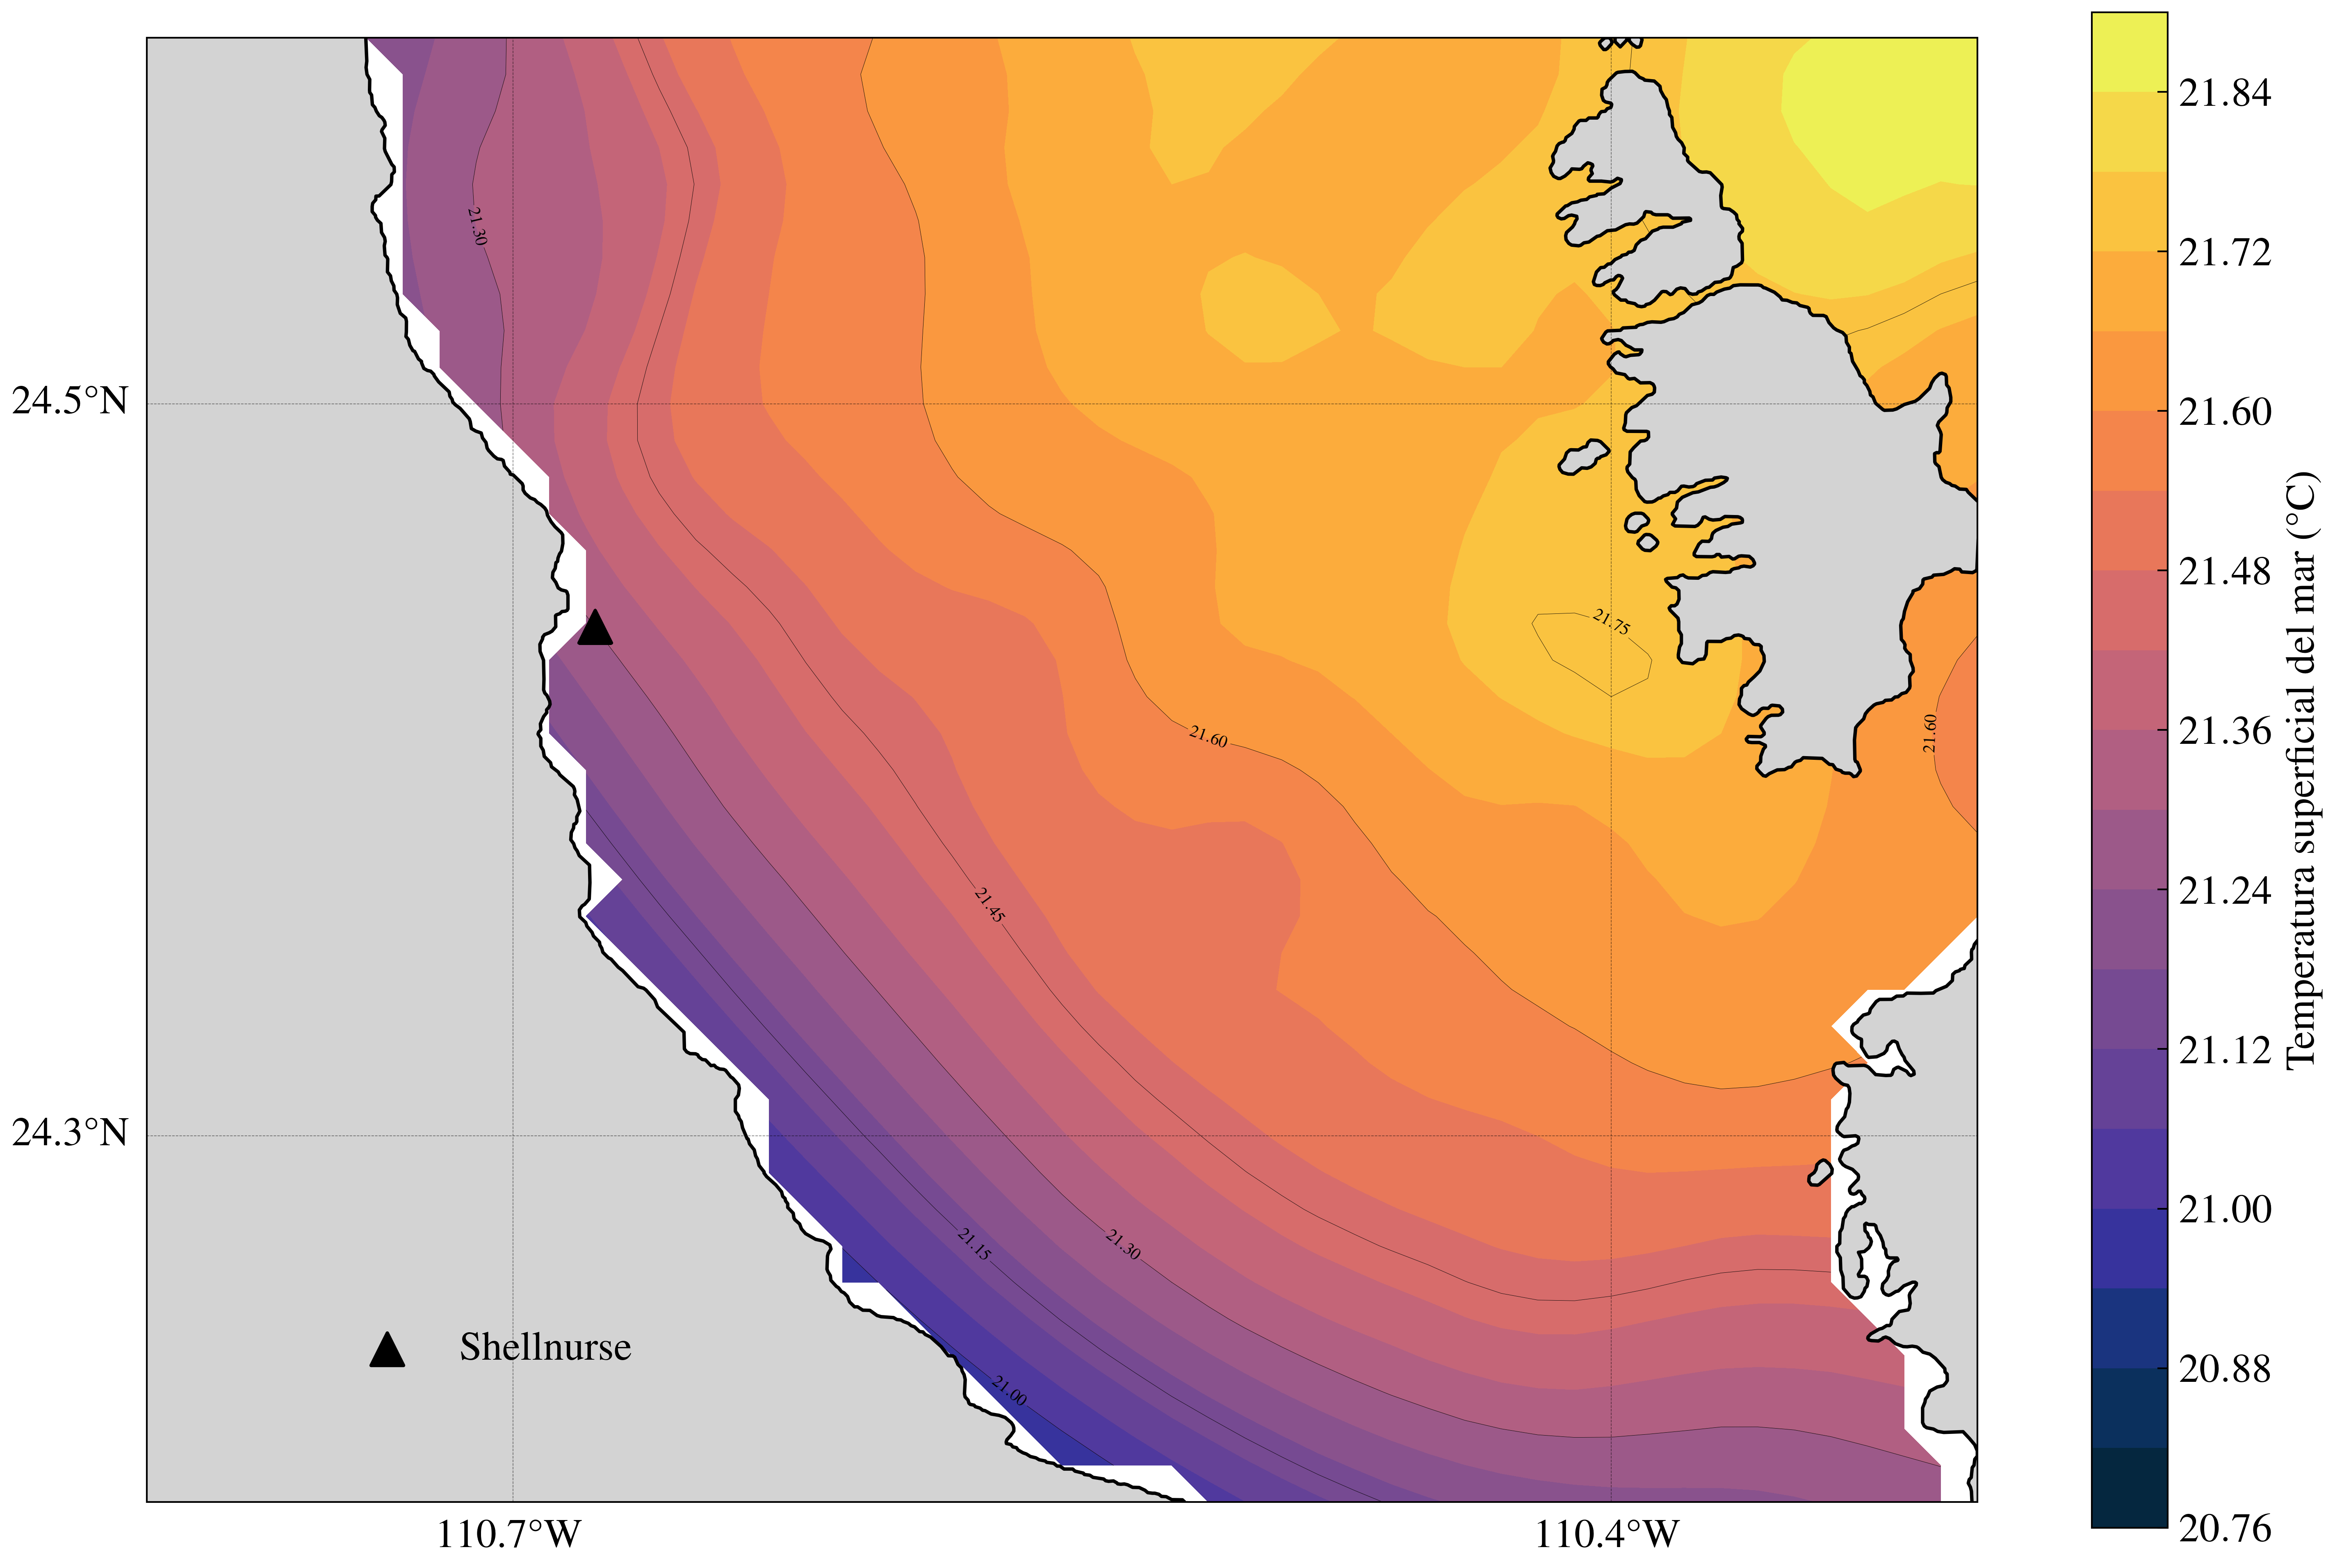

In [15]:
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(12,8))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


#ax.add_feature(cartopy.feature.LAND, )
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

extent = [-110.8, -110.3, 24.2, 24.6]

ax.set_extent(extent)

coast = cfeature.GSHHSFeature(scale='f')
ax.add_feature(coast, facecolor="lightgray")
#ax.add_feature(cfeature.LAND)
#ax.coastlines(resolution='10m')
gl=ax.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-110.7, -110.4])
gl.ylocator = mticker.FixedLocator([24.3, 24.5])
gl.top_labels = False
gl.right_labels = False

Q = ax.contourf(lon[lon_ind], lat[lat_ind], temperatura_cortada_cel, levels=18, cmap= cm.thermal, zorder = -2)
QQ = ax.contour(lon[lon_ind], lat[lat_ind], temperatura_cortada_cel, levels=8, colors="k", zorder=-2, 
               linewidths =0.1)

cbar = plt.colorbar(Q)

ax.clabel(QQ, inline=True,
           fontsize=5, inline_spacing=8)

cbar.set_label('Temperatura superficial del mar (°C)')

plt.scatter(lon_tri, lat_tri, s=90, c='k', marker="^", 
            transform = ccrs.PlateCarree(), label='Shellnurse')
plt.legend(loc = (0.1, 0.08))

#plt.title(fvcom.time.datetime[i].strftime('%Y-%m-%d %H:%M:%S'))
#plt.title(rounded[0])
plt.savefig('plots/temperature14.png', dpi=450, bbox_inches='tight')